# Import Library

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score,confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

import joblib

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Data Loading

### Remarks: No test.csv is provided. So we split the data in train.csv into both train and test data

### Target Variable: `price_range`

In [2]:
df = pd.read_csv("/kaggle/input/mobile-price-classification/train.csv")
df.head(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
print(f"There are {df.shape[0]} rows and {df.shape[1]} colums")

There are 2000 rows and 21 colums


# Data Cleaning

## Check Missing Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

All columns are numeric columns.

In [5]:
df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

There are no null values in the dataset.

In [6]:
df.duplicated().sum()

0

Insights: 
- All columns are numerical features. No categorical features found
- No missing data (NaN) found
- No duplicated rows

Conclusion:
- The data is quite clean.

# EDA on Training Dataset

In [7]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [8]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

## Univariate Analysis

In [9]:
col_continuous = ["battery_power","clock_speed",
                  "int_memory","m_dep","mobile_wt",
                  "px_height","px_width","ram",
                  "sc_h","sc_w","talk_time"]

In [10]:
col_discrete = ["blue","dual_sim","fc",
                "four_g","n_cores","pc",
                "three_g","touch_screen","wifi"]

### Columns with cotinuous numercial data

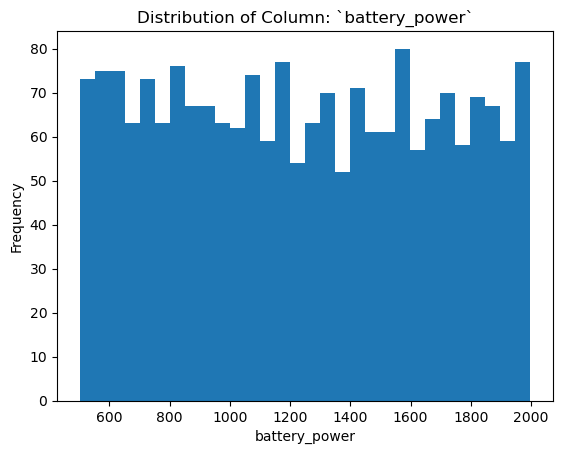

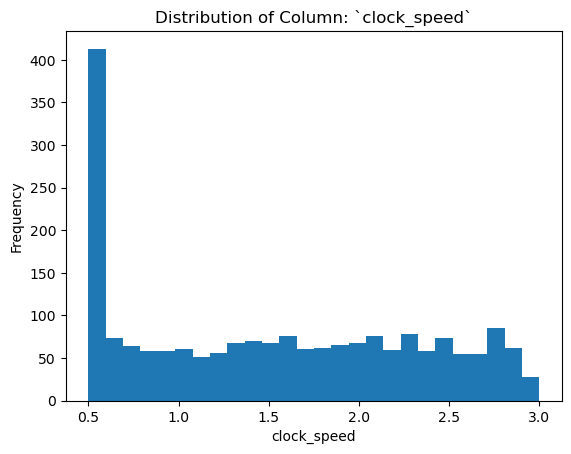

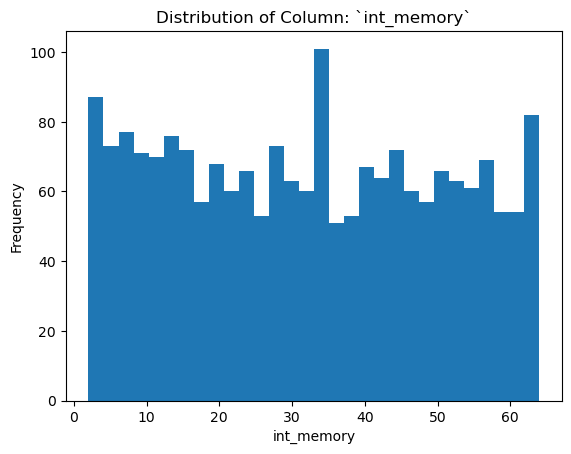

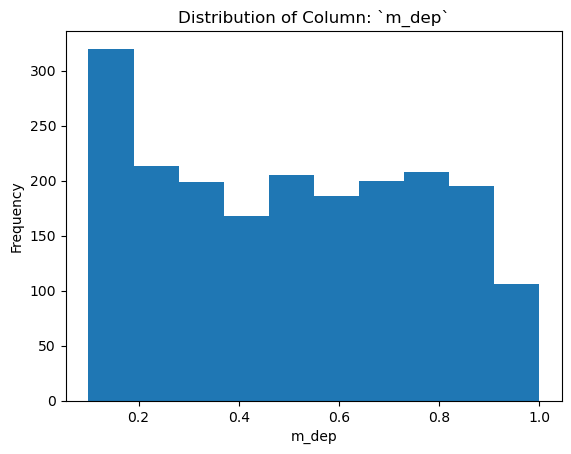

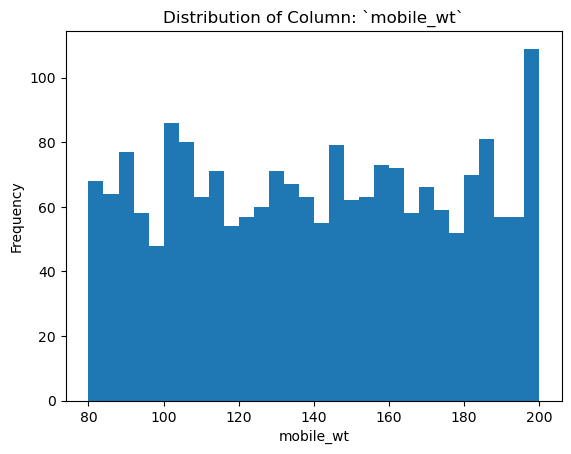

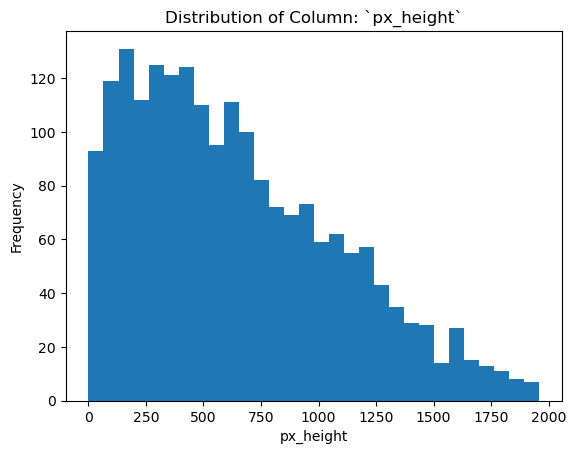

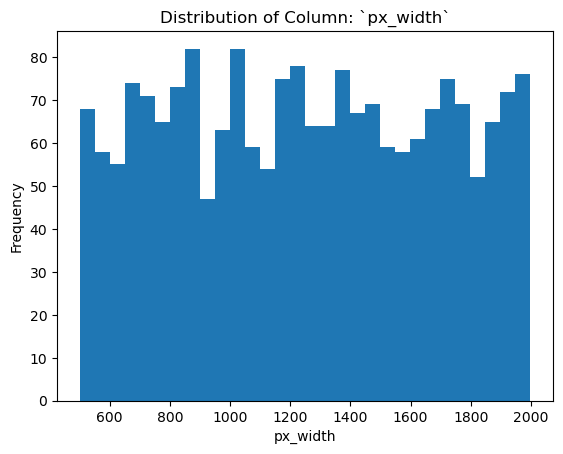

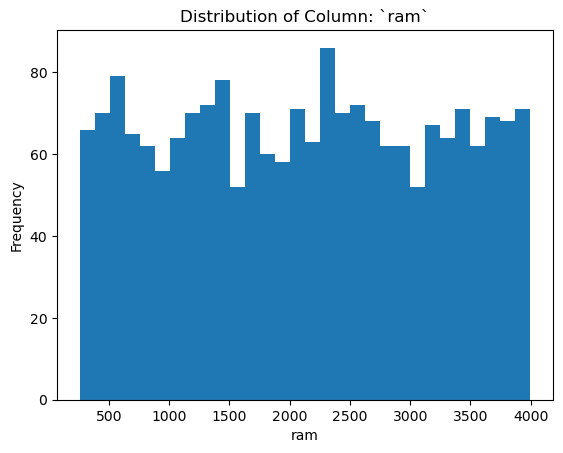

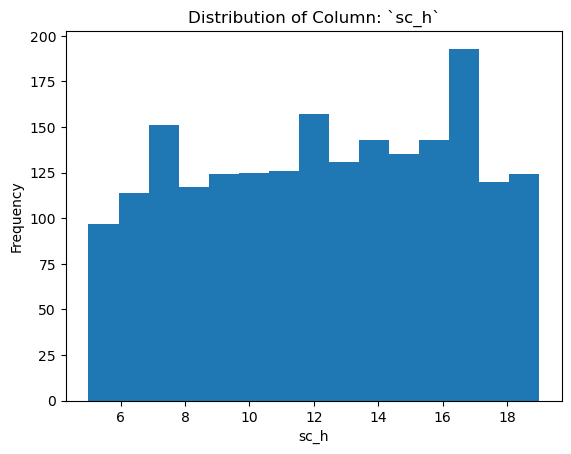

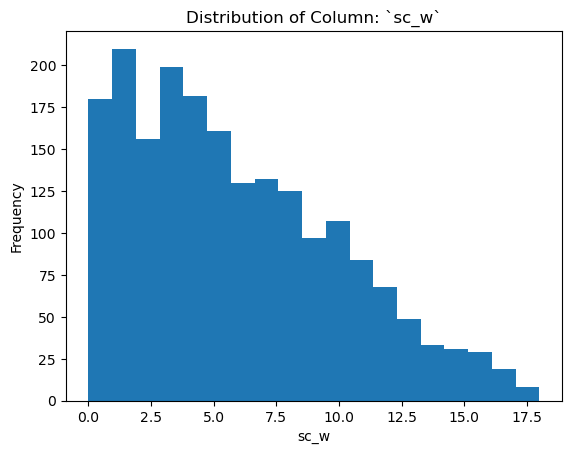

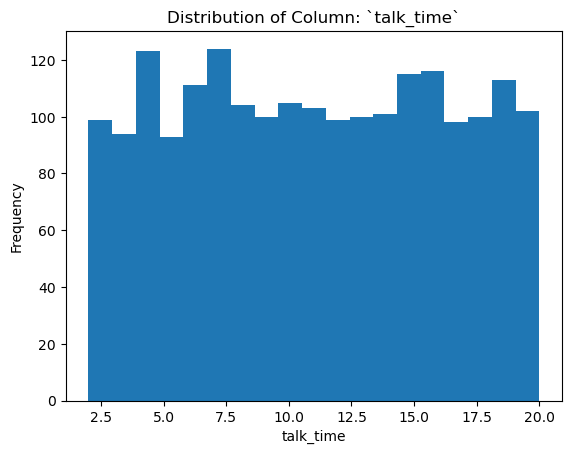

In [11]:
for col in col_continuous:
    data = df[col]
    bins = min(30,len(df[col].unique()))
    df[col].plot(kind = "hist",bins = bins)
    plt.xlabel(col)
    plt.title(f"Distribution of Column: `{col}`")
    plt.show()

In [12]:
print(f"There are {(df['sc_w'] == 0).sum()} records with a value of 0 in column `sc_w`.")

There are 180 records with a value of 0 in column `sc_w`.


In [13]:
print(f"There are {(df['px_height'] == 0).sum()} records with a value of 0 in column `px_height`.")

There are 2 records with a value of 0 in column `px_height`.


**Isight:**
- For `clock_speed`, over 20 % of the mobile phone are with 0.5 clock speed.
- For `px_height` and `sc_w`, they are both right-skewed.
- Some of the mobiles have 0 `sc_w` or `px_height`.
- For other columns, they are all seems to have a uniform distribution.

**Follow-up:**
- Remove records with zero in `px_height` but not zero in `px_width` because a phone cannot have a camera pixel with zero in height but non-zero in width
- Remove records with zero in `sc_w` because a phone cannot have no screen_width.

### Columns with discrete numercial data

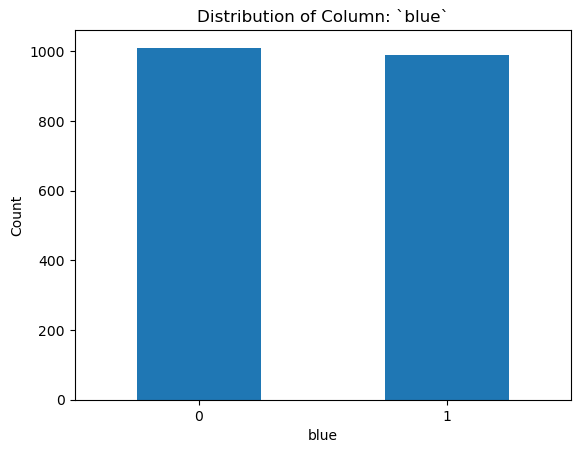

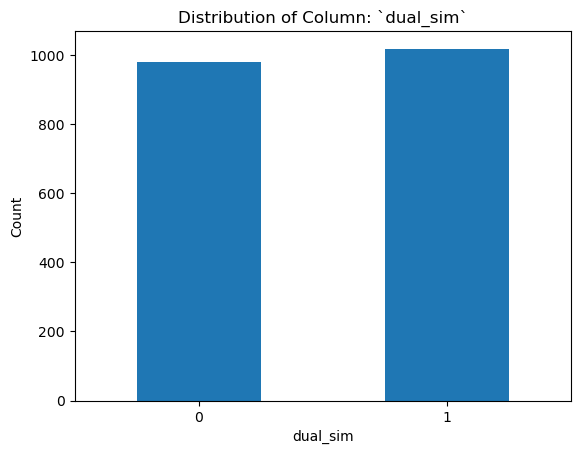

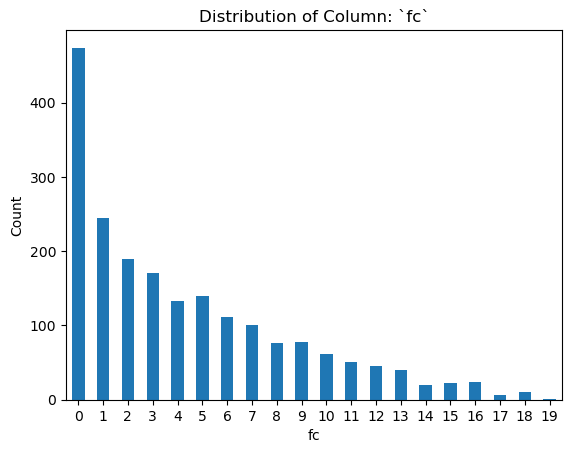

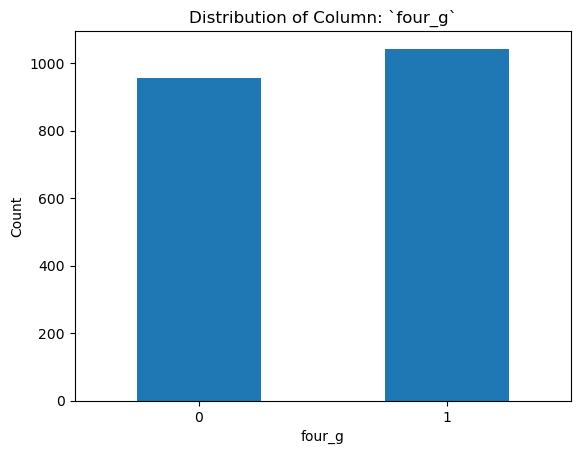

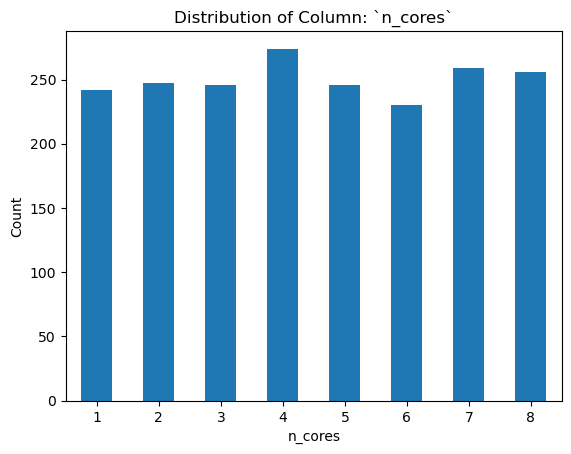

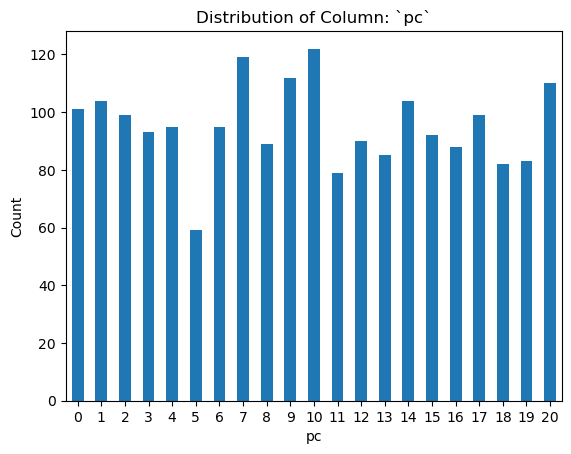

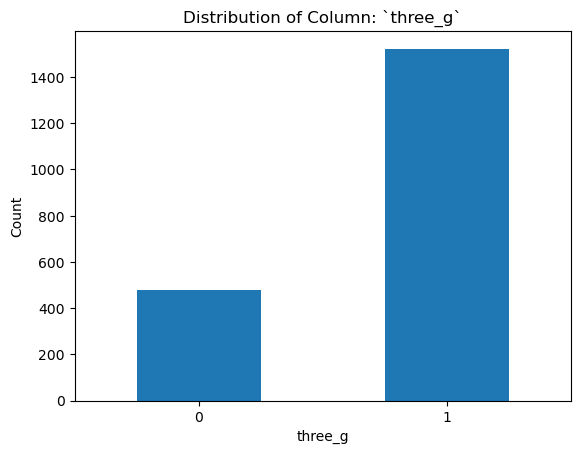

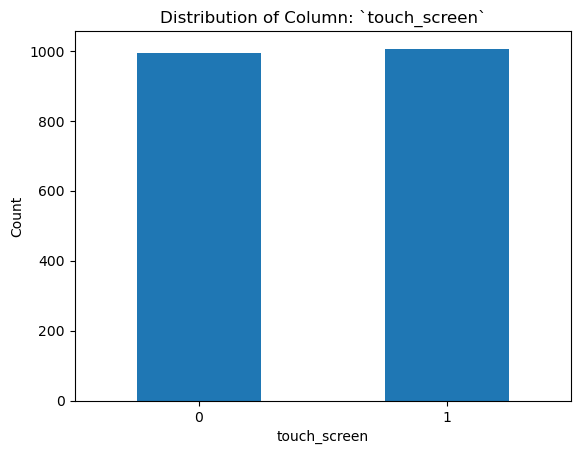

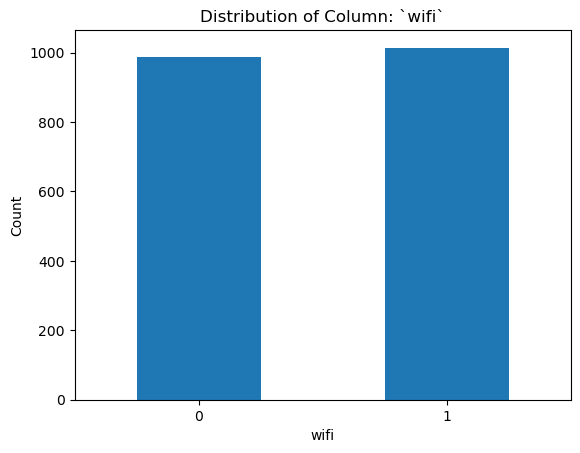

In [14]:
for col in col_discrete:
    data = df[col].value_counts().sort_index()
    data.plot(kind = "bar")
    
    plt.ylabel("Count")
    plt.xlabel(col)
    plt.title(f"Distribution of Column: `{col}`")
    plt.xticks(rotation = 0)
    
    plt.show()

In [15]:
print(f"There are {(df['fc'] == 0).sum()} records with a value of 0 in column `fc`.")

There are 474 records with a value of 0 in column `fc`.


In [16]:
print(f"There are {(df['pc'] == 0).sum()} records with a value of 0 in column `pc`.")

There are 101 records with a value of 0 in column `pc`.


**Insight:**
- For `fc`, it is right-skewed. 
- Some of the mobile phones have 0 value in `fc` or `pc`. 0 value in these columns imply that these mobile phones have no camera. But this is possible, so we do not remove them.
- Around 1/4 of mobile phones do not support 3G.
- For other columns, it seems to be uniformly distributed.

## Drop records with zero `px_height` and `sc_w`

In [17]:
df = df[(df["px_height"] != 0)&((df["sc_w"] != 0))]

In [18]:
print(f"Now we have {df.shape[0]} rows left")

Now we have 1819 rows left


## Bivariate Analysis

### Columns: `battery_power` vs `price_range`

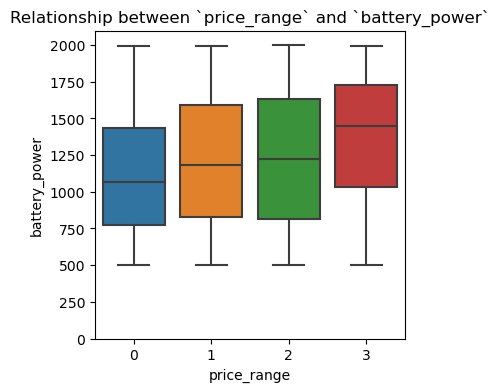

In [19]:
col = "battery_power"
plt.figure(figsize=(4,4))
sns.boxplot(x="price_range", y=col,
            data=df)
plt.ylim([0,df[col].max()*1.05])
plt.title(f"Relationship between `price_range` and `{col}`")
plt.show()

It seems that the more battery power the phone has, the higher price it has.

### Columns: `clock_speed` vs `price_range`

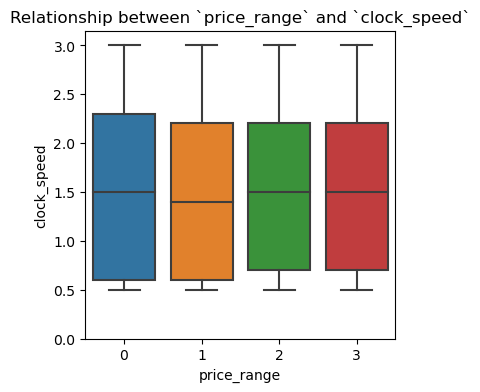

In [20]:
col = "clock_speed"
plt.figure(figsize=(4,4))
sns.boxplot(x="price_range", y=col,
            data=df)
plt.ylim([0,df[col].max()*1.05])
plt.title(f"Relationship between `price_range` and `{col}`")
plt.show()

We do not see any observable relationship between `price_range` and `clock_speed`.

### Columns: `int_memory` vs `price_range`

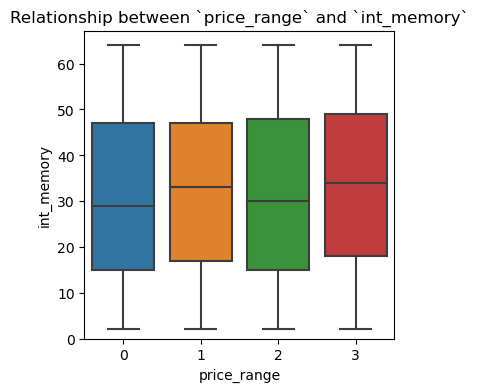

In [21]:
col = "int_memory"
plt.figure(figsize=(4,4))
sns.boxplot(x="price_range", y=col,
            data=df)
plt.ylim([0,df[col].max()*1.05])
plt.title(f"Relationship between `price_range` and `{col}`")
plt.show()

We do not see any observable relationship between `price_range` and `int_memory`.

### Columns: `m_dep` vs `price_range`

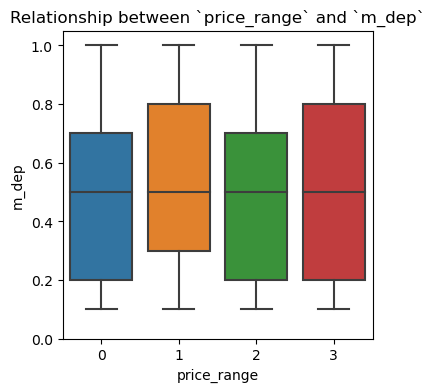

In [22]:
col = "m_dep"
plt.figure(figsize=(4,4))
sns.boxplot(x="price_range", y=col,
            data=df)
plt.ylim([0,df[col].max()*1.05])
plt.title(f"Relationship between `price_range` and `{col}`")
plt.show()

We do not see any observable relationship between `price_range` and `m_dep`.

### Columns: `mobile_wt` vs `price_range`

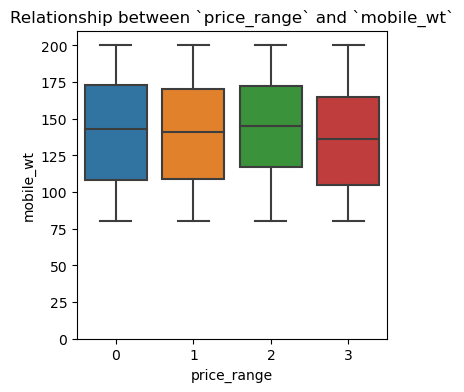

In [23]:
col = "mobile_wt"
plt.figure(figsize=(4,4))
sns.boxplot(x="price_range", y=col,
            data=df)
plt.ylim([0,df[col].max()*1.05])
plt.title(f"Relationship between `price_range` and `{col}`")
plt.show()

We do not see any observable relationship between `price_range` and `mobile_wt`.

### Columns: `px_height` vs `price_range`

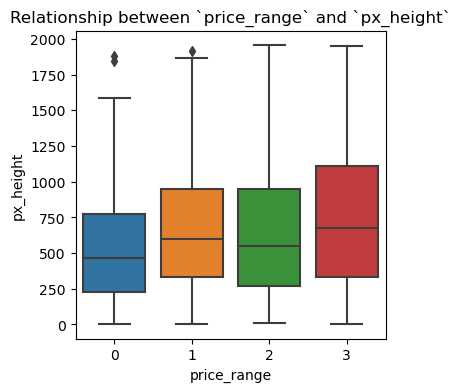

In [24]:
col = "px_height"
plt.figure(figsize=(4,4))
sns.boxplot(x="price_range", y=col,
            data=df)
plt.ylim([-100,df[col].max()*1.05])
plt.title(f"Relationship between `price_range` and `{col}`")
plt.show()

It seems that mobile phones with larger `px_height`, they will have higher `price range`.

### Columns: `px_width` vs `price_range`

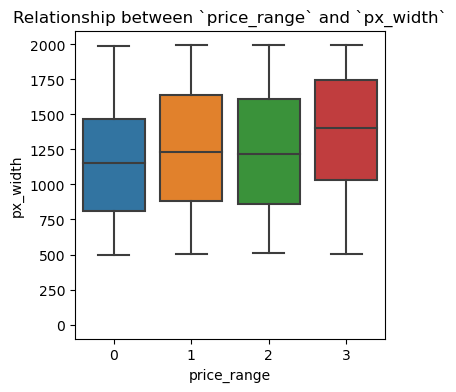

In [25]:
col = "px_width"
plt.figure(figsize=(4,4))
sns.boxplot(x="price_range", y=col,
            data=df)
plt.ylim([-100,df[col].max()*1.05])
plt.title(f"Relationship between `price_range` and `{col}`")
plt.show()

It seems that mobile phones with larger `px_width`, they will have higher `price range`.

### Columns: `ram` vs `price_range`

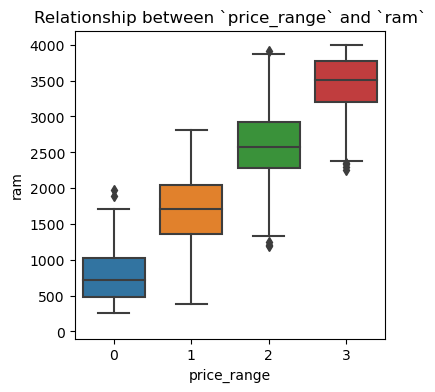

In [26]:
col = "ram"
plt.figure(figsize=(4,4))
sns.boxplot(x="price_range", y=col,
            data=df)
plt.ylim([-100,df[col].max()*1.05])
plt.title(f"Relationship between `price_range` and `{col}`")
plt.show()

It seems that mobile phones with larger `ram`, they will have higher `price range`.

### Columns: `sc_h` vs `price_range`

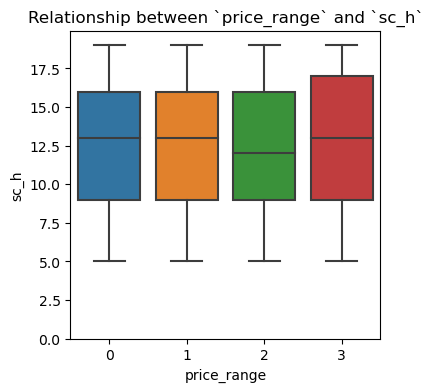

In [27]:
col = "sc_h"
plt.figure(figsize=(4,4))
sns.boxplot(x="price_range", y=col,
            data=df)
plt.ylim([0,df[col].max()*1.05])
plt.title(f"Relationship between `price_range` and `{col}`")
plt.show()

We do not see any observable relationship between `price_range` and `sc_h`.

### Columns: `sc_w` vs `price_range`

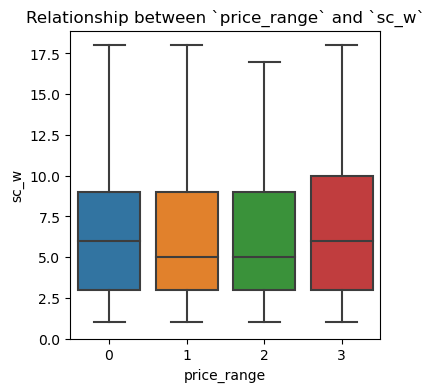

In [28]:
col = "sc_w"
plt.figure(figsize=(4,4))
sns.boxplot(x="price_range", y=col,
            data=df)
plt.ylim([0,df[col].max()*1.05])
plt.title(f"Relationship between `price_range` and `{col}`")
plt.show()

We do not see any observable relationship between `price_range` and `sc_w`.

## Correlation Analysis

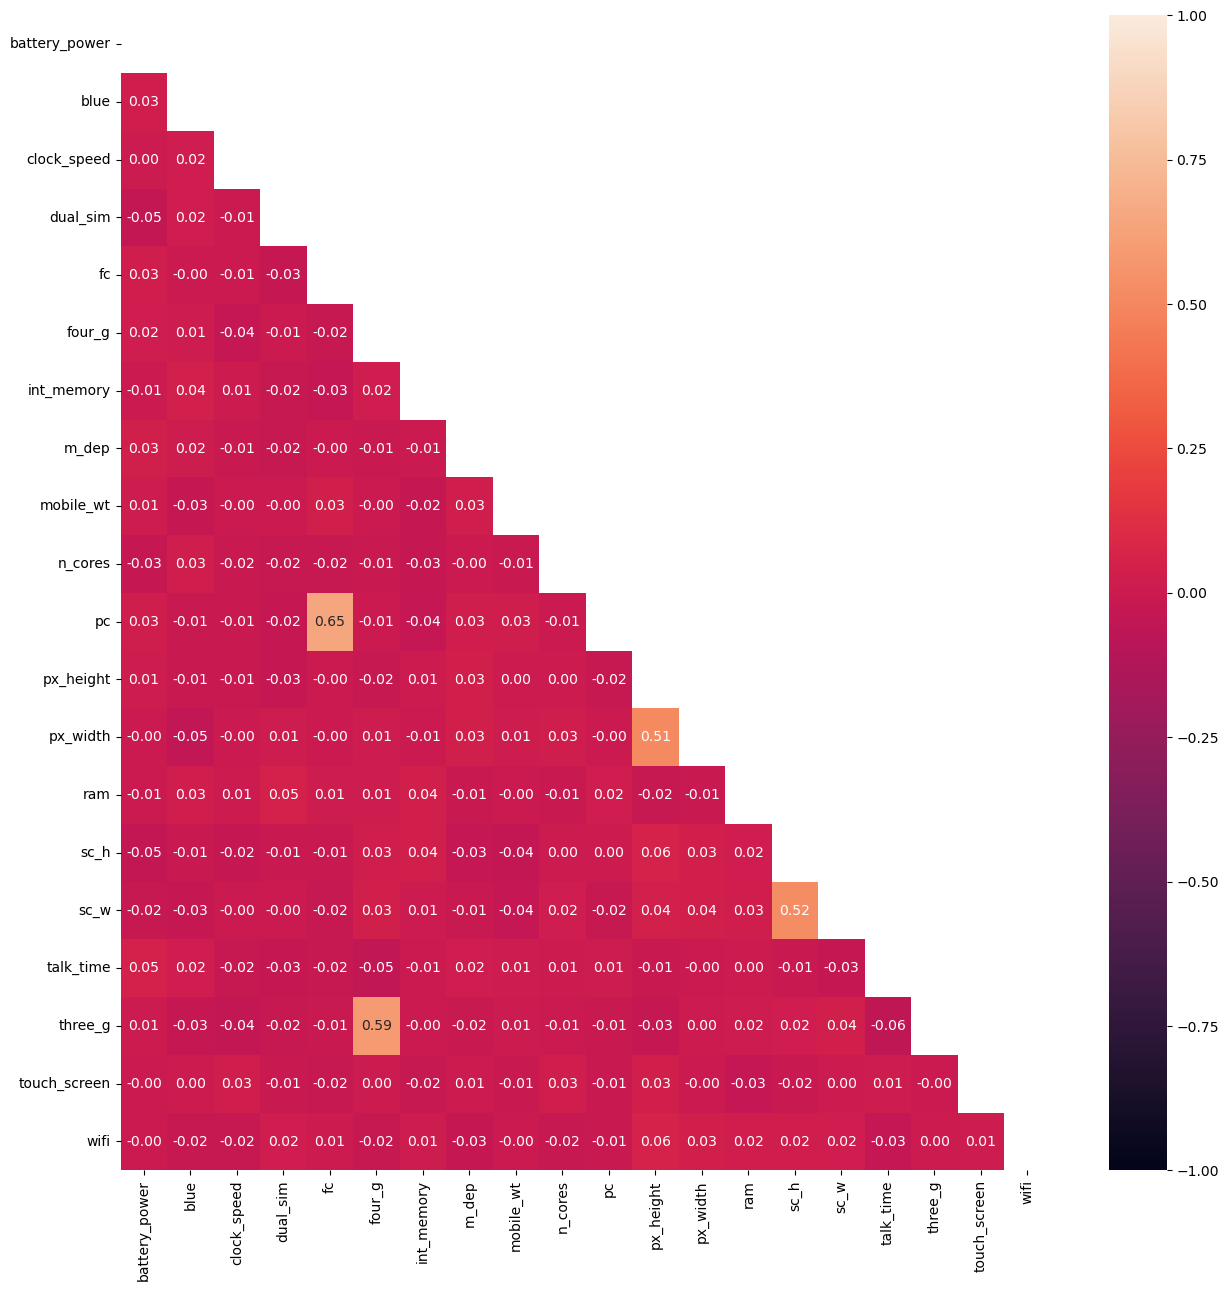

In [29]:
plt.figure(figsize=(15,15))
data = df.drop(columns=["price_range"]).corr()
mask = np.triu(data)
sns.heatmap(data,
            annot = True,
            fmt=".2f",
            mask = mask,
            vmin=-1,
            vmax = 1)
plt.show()

**Insight:**
- For `pc` ad `fc`, they are highly correlated. We will need to drop one of them to avoid collinearity. We will drop the `fc`, which means "Front-Camera" because people use primary camera more often, which makes it more important to contribute value of a mobile phone.
- For `px_width` ad `px_height`, they are correlated. We will need to drop one of them to avoid collinearity. We will drop the `px_height` as it contains some zero in the original dataset.
- For `sc_h` ad `sc_w`, they are correlated. We will need to drop one of them to avoid collinearity. We will drop the `sc_w` as it contains some zero in the original dataset.
- For `three_g` ad `four_g`, they are correlated. We will need to drop one of them to avoid collinearity. We will drop `three_g` as `four_g` is a more advanced technology which most of the buyer will care more about. Also the distribution of `four_g` is more balanced.

### Wait!
- Each phone has it own `px_height` and `px_width`, it is a paired feature, they may serve some interaction effect of the data modeling. Let's create a column called `px_area` which is the multiple of these two columns.
- Similar effect may happen in `sc_h` and `sc_w`

## Interaction Effect

In [30]:
df["px_area"] = df["px_height"] * df["px_width"]
df["sc_area"] = df["sc_h"] * df["sc_w"]

After creating the interaction columns, let's drop the original columns.

### Drop the columns that are highly correlated

In [31]:
df.drop(columns=["fc","px_height","px_width","sc_w","sc_h","three_g"],inplace = True)

### Sanity Check

In [32]:
print(f"Now we have {df.shape[0]} rows left and {df.shape[1]} features left")

Now we have 1819 rows left and 17 features left


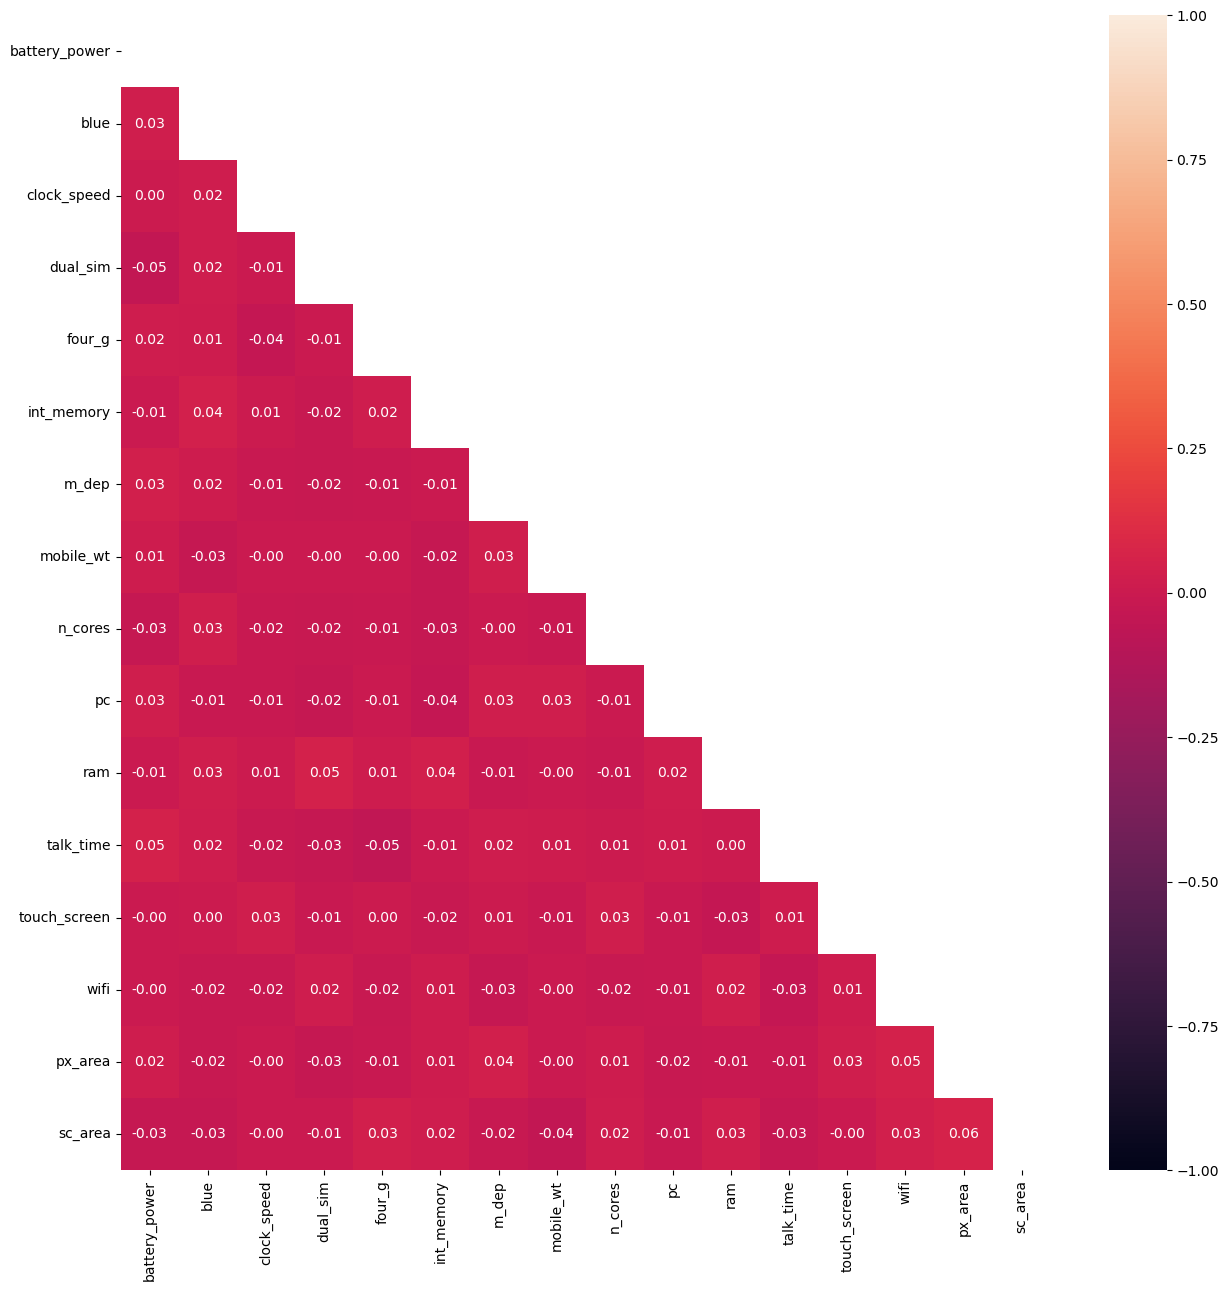

In [33]:
plt.figure(figsize=(15,15))
data = df.drop(columns=["price_range"]).corr()
mask = np.triu(data)
sns.heatmap(data,
            annot = True,
            fmt=".2f",
            mask = mask,
            vmin=-1,
            vmax = 1)
plt.show()

The dataset is now ready for data modelling.

# Split Data

In [34]:
# Extract the target variable 
y = df["price_range"]

# Extract all features other than target variable
X = df.drop(columns=["price_range"])

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 42)

# Check the shape of the split data set
print(f"Shape for X_train: {X_train.shape}")
print(f"Shape for X_test: {X_test.shape}")
print(f"Shape for y_train: {y_train.shape}")
print(f"Shape for y_test: {y_test.shape}")


Shape for X_train: (1364, 16)
Shape for X_test: (455, 16)
Shape for y_train: (1364,)
Shape for y_test: (455,)


# Data Scaling

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer

In [36]:
X_train.head()

,battery_power,blue,clock_speed,dual_sim,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,ram,talk_time,touch_screen,wifi,px_area,sc_area
1662,1751,0,2.5,0,0,4,0.6,146,8,9,1155,12,1,1,2926048,266
1025,1081,1,2.5,1,0,49,1.0,99,3,17,325,6,0,1,147396,9
1995,794,1,0.5,1,1,2,0.8,106,6,14,668,19,1,0,2309580,52
450,712,1,0.5,1,1,35,0.2,84,2,10,2190,4,1,1,674064,192
1542,1908,0,0.5,0,1,30,1.0,111,2,19,2944,17,0,1,146440,323


## Customized Scaler

In [37]:
col_to_be_scale = ["battery_power","clock_speed","int_memory",
                   "m_dep","mobile_wt","n_cores","pc","ram",
                   "talk_time","px_area","sc_area"]

In [38]:
# Instantiate customized scaler (only apply standard scaler on above mentioned columns)
customized_scaler = make_column_transformer(
    (StandardScaler(), col_to_be_scale),
    remainder='passthrough',
    verbose_feature_names_out=False,
)

customized_scaler.set_output(transform="pandas")

ColumnTransformer(remainder='passthrough',
                  transformers=[('standardscaler', StandardScaler(),
                                 ['battery_power', 'clock_speed', 'int_memory',
                                  'm_dep', 'mobile_wt', 'n_cores', 'pc', 'ram',
                                  'talk_time', 'px_area', 'sc_area'])],
                  verbose_feature_names_out=False)

In [39]:
# # Fit the train data
# customer_scaler.fit(X_train)

# # Scaling the train data
# scaled_X_train = customer_scaler.transform(X_train)
# scaled_X_train

In [40]:
# # Scaling the test data
# scaled_X_test= customer_scaler.transform(X_test)
# scaled_X_test

# Baseline Model - Logistic Regression

In [41]:
# Define Hyperparameters
base_logit_params = {
    "log_reg__C":[10**i for i in [-5,-3,-1,0,1,3,5]]
}

In [42]:
# Define k-fold cross validation
cv = StratifiedKFold(n_splits=5,
                     shuffle=True,
                     random_state=42)

In [43]:
# Instantiate the model pipeline with Grid Search and Cross Validation
base_logit = LogisticRegression(max_iter = 10000)

base_logit_pipeline = Pipeline([("my_sclaer",customized_scaler),
                                ("log_reg",base_logit)])

base_logit_gs = GridSearchCV(base_logit_pipeline,
                             param_grid = base_logit_params,
                             scoring = "f1_weighted",
                             n_jobs = -1,
                             verbose = 1)

In [44]:
# Model Fitting
base_logit_gs.fit(X_train,y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


GridSearchCV(estimator=Pipeline(steps=[('my_sclaer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         ['battery_power',
                                                                          'clock_speed',
                                                                          'int_memory',
                                                                          'm_dep',
                                                                          'mobile_wt',
                                                                          'n_cores',
                                                                          'pc',
                                                                          'ram',
                                                                          'talk_time',
                                                                          'px_area',
                                                                          'sc_area'])],
                                                          verbose_feature_names_out=False)),
                                       ('log_reg',
                                        LogisticRegression(max_iter=10000))]),
             n_jobs=-1,
             param_grid={'log_reg__C': [1e-05, 0.001, 0.1, 1, 10, 1000,
                                        100000]},
             scoring='f1_weighted', verbose=1)

In [45]:
# Base Model Parameters
base_logit_gs.best_params_

{'log_reg__C': 10}

In [46]:
# Base Model Train Data F1 Score
print(f"The best Logistic Regression model is with F1 score of {round(base_logit_gs.best_score_,4)}")

The best Logistic Regression model is with F1 score of 0.9251


In [47]:
# Make Prediction
base_y_pred = base_logit_gs.predict(X_test)

In [48]:
conf_mat_df = pd.DataFrame(confusion_matrix(y_test,base_y_pred),
                           index = [f"Actual_Class_{i}" for i in y_test.unique()],
                           columns = [f"Predicted_Class_{i}" for i in y_test.unique()])
conf_mat_df

,Predicted_Class_1,Predicted_Class_0,Predicted_Class_2,Predicted_Class_3
Actual_Class_1,101,6,0,0
Actual_Class_0,3,108,4,0
Actual_Class_2,0,3,109,7
Actual_Class_3,0,0,5,109


In [49]:
print(classification_report(y_test,base_y_pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96       107
           1       0.92      0.94      0.93       115
           2       0.92      0.92      0.92       119
           3       0.94      0.96      0.95       114

    accuracy                           0.94       455
   macro avg       0.94      0.94      0.94       455
weighted avg       0.94      0.94      0.94       455



In [50]:
print(f"The F1 score of the base model (Logistic Regression): {round(f1_score(y_test,base_y_pred,average='weighted'),4)}")

The F1 score of the base model (Logistic Regression): 0.9385


In [51]:
model_comparison_df = pd.DataFrame()
this_df = pd.DataFrame([{"model":"Logistic Regression","test_data_f1":round(f1_score(y_test,base_y_pred,average='weighted'),4)}])
model_comparison_df = pd.concat([model_comparison_df,this_df],ignore_index = True)
model_comparison_df

,model,test_data_f1
0,Logistic Regression,0.9385


# Gradient Boosting

In [52]:
# Define Hyperparameters
gbc_params = {
    "gbc__learning_rate":[10**i for i in [-2-1,0,1,2]],
    "gbc__n_estimators": [50,100,200],
    "gbc__max_depth": [5,10,20],
    "gbc__min_samples_split":[3,5,7]
}

In [53]:
# Define k-fold cross validation
cv = StratifiedKFold(n_splits=5,
                     shuffle=True,
                     random_state=42)

In [54]:
# Instantiate the model pipeline with Grid Search and Cross Validation
gbc = GradientBoostingClassifier()

gbc_pipeline = Pipeline([("my_sclaer",customized_scaler),
                         ("gbc",gbc)])

gbc_gs = GridSearchCV(gbc_pipeline,
                      param_grid = gbc_params,
                      scoring = "f1_weighted",
                      n_jobs = -1,
                      verbose = 1)

In [55]:
# Model Fitting
gbc_gs.fit(X_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(estimator=Pipeline(steps=[('my_sclaer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         ['battery_power',
                                                                          'clock_speed',
                                                                          'int_memory',
                                                                          'm_dep',
                                                                          'mobile_wt',
                                                                          'n_cores',
                                                                          'pc',
                                                                          'ram',
                                                                          'talk_time',
                                                                          'px_area',
                                                                          'sc_area'])],
                                                          verbose_feature_names_out=False)),
                                       ('gbc', GradientBoostingClassifier())]),
             n_jobs=-1,
             param_grid={'gbc__learning_rate': [0.001, 1, 10, 100],
                         'gbc__max_depth': [5, 10, 20],
                         'gbc__min_samples_split': [3, 5, 7],
                         'gbc__n_estimators': [50, 100, 200]},
             scoring='f1_weighted', verbose=1)

In [56]:
# Base Model Parameters
gbc_gs.best_params_

{'gbc__learning_rate': 1,
 'gbc__max_depth': 10,
 'gbc__min_samples_split': 5,
 'gbc__n_estimators': 50}

In [57]:
# Base Model Train Data F1 Score
print(f"The best Gradient Boosting model is with F1 score of {round(gbc_gs.best_score_,4)}")

The best Gradient Boosting model is with F1 score of 0.8923


In [58]:
# Make Prediction
gbc_y_pred = gbc_gs.predict(X_test)

In [59]:
conf_mat_df = pd.DataFrame(confusion_matrix(y_test,gbc_y_pred),
                           index = [f"Actual_Class_{i}" for i in y_test.unique()],
                           columns = [f"Predicted_Class_{i}" for i in y_test.unique()])
conf_mat_df

,Predicted_Class_1,Predicted_Class_0,Predicted_Class_2,Predicted_Class_3
Actual_Class_1,98,9,0,0
Actual_Class_0,7,98,10,0
Actual_Class_2,0,8,97,14
Actual_Class_3,0,0,12,102


In [60]:
print(classification_report(y_test,gbc_y_pred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92       107
           1       0.85      0.85      0.85       115
           2       0.82      0.82      0.82       119
           3       0.88      0.89      0.89       114

    accuracy                           0.87       455
   macro avg       0.87      0.87      0.87       455
weighted avg       0.87      0.87      0.87       455



In [61]:
print(f"The F1 score of the base model (Gradient Boosting Classifier): {round(f1_score(y_test,gbc_y_pred,average='weighted'),4)}")

The F1 score of the base model (Gradient Boosting Classifier): 0.8682


In [62]:
this_df = pd.DataFrame([{"model":"Gradient Boosting","test_data_f1":round(f1_score(y_test,gbc_y_pred,average='weighted'),4)}])
model_comparison_df = pd.concat([model_comparison_df,this_df],ignore_index = True)
model_comparison_df

,model,test_data_f1
0,Logistic Regression,0.9385
1,Gradient Boosting,0.8682


# Random Forest

In [63]:
# Define Hyperparameters
rf_params = {
    "rf__n_estimators": [50,100],
    "rf__max_depth": [5,10,20],
    "rf__min_samples_split":[3,5,7],
}

In [64]:
# Define k-fold cross validation
cv = StratifiedKFold(n_splits=5,
                     shuffle=True,
                     random_state=42)

In [65]:
# Instantiate the model pipeline with Grid Search and Cross Validation
rf = RandomForestClassifier()

rf_pipeline = Pipeline([("my_sclaer",customized_scaler),
                         ("rf",rf)])

rf_gs = GridSearchCV(rf_pipeline,
                     param_grid = rf_params,
                     scoring = "f1_weighted",
                     n_jobs = -1,
                     verbose = 1)

In [66]:
# Model Fitting
rf_gs.fit(X_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(estimator=Pipeline(steps=[('my_sclaer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         ['battery_power',
                                                                          'clock_speed',
                                                                          'int_memory',
                                                                          'm_dep',
                                                                          'mobile_wt',
                                                                          'n_cores',
                                                                          'pc',
                                                                          'ram',
                                                                          'talk_time',
                                                                          'px_area',
                                                                          'sc_area'])],
                                                          verbose_feature_names_out=False)),
                                       ('rf', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'rf__max_depth': [5, 10, 20],
                         'rf__min_samples_split': [3, 5, 7],
                         'rf__n_estimators': [50, 100]},
             scoring='f1_weighted', verbose=1)

In [67]:
# Base Model Parameters
rf_gs.best_params_

{'rf__max_depth': 20, 'rf__min_samples_split': 5, 'rf__n_estimators': 50}

In [68]:
# Base Model Train Data F1 Score
print(f"The best Random Forest model is with F1 score of {round(rf_gs.best_score_,4)}")

The best Random Forest model is with F1 score of 0.8749


In [69]:
# Make Prediction
rf_y_pred = rf_gs.predict(X_test)

In [70]:
conf_mat_df = pd.DataFrame(confusion_matrix(y_test,rf_y_pred),
                           index = [f"Actual_Class_{i}" for i in y_test.unique()],
                           columns = [f"Predicted_Class_{i}" for i in y_test.unique()])
conf_mat_df

,Predicted_Class_1,Predicted_Class_0,Predicted_Class_2,Predicted_Class_3
Actual_Class_1,98,9,0,0
Actual_Class_0,7,96,12,0
Actual_Class_2,0,6,99,14
Actual_Class_3,0,0,13,101


In [71]:
print(classification_report(y_test,rf_y_pred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92       107
           1       0.86      0.83      0.85       115
           2       0.80      0.83      0.81       119
           3       0.88      0.89      0.88       114

    accuracy                           0.87       455
   macro avg       0.87      0.87      0.87       455
weighted avg       0.87      0.87      0.87       455



In [72]:
print(f"The F1 score of the base model (Random Forest Classifier): {round(f1_score(y_test,rf_y_pred,average='weighted'),4)}")

The F1 score of the base model (Random Forest Classifier): 0.8663


In [73]:
this_df = pd.DataFrame([{"model":"Random Forest","test_data_f1":round(f1_score(y_test,rf_y_pred,average='weighted'),4)}])
model_comparison_df = pd.concat([model_comparison_df,this_df],ignore_index = True)
model_comparison_df

,model,test_data_f1
0,Logistic Regression,0.9385
1,Gradient Boosting,0.8682
2,Random Forest,0.8663


From the model comparison table above, it seems that tree-based model does not perform well on this task. Let's try out some other non tree-based method.

# K-Nearest-Neighbor

In [74]:
# Define Hyperparameters
knn_params = {
    "knn__n_neighbors": [i for i in range(1,51,2)],
}

In [75]:
# Define k-fold cross validation
cv = StratifiedKFold(n_splits=5,
                     shuffle=True,
                     random_state=42)

In [76]:
# Instantiate the model with Grid Search and Cross Validation
knn = KNeighborsClassifier()

knn_pipeline = Pipeline([("my_sclaer",customized_scaler),
                         ("knn",knn)])

knn_gs = GridSearchCV(knn_pipeline,
                      param_grid = knn_params,
                      scoring = "f1_weighted",
                      n_jobs = -1, 
                      verbose = 1)

In [77]:
# Model Fitting
knn_gs.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


GridSearchCV(estimator=Pipeline(steps=[('my_sclaer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         ['battery_power',
                                                                          'clock_speed',
                                                                          'int_memory',
                                                                          'm_dep',
                                                                          'mobile_wt',
                                                                          'n_cores',
                                                                          'pc',
                                                                          'ram',
                                                                          'talk_time',
                                                                          'px_area',
                                                                          'sc_area'])],
                                                          verbose_feature_names_out=False)),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'knn__n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19,
                                              21, 23, 25, 27, 29, 31, 33, 35,
                                              37, 39, 41, 43, 45, 47, 49]},
             scoring='f1_weighted', verbose=1)

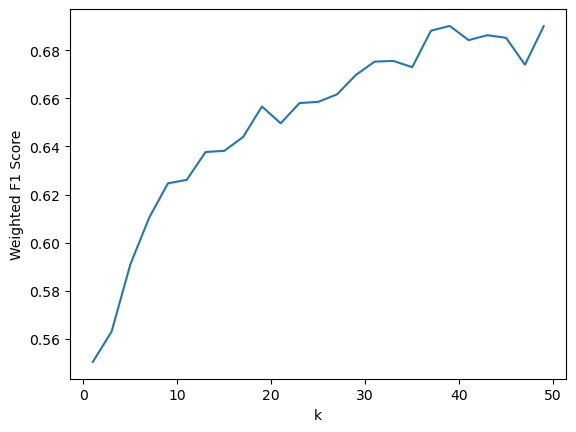

In [78]:
cv_res = pd.DataFrame(knn_gs.cv_results_)

plt.figure()
plt.plot(cv_res["param_knn__n_neighbors"],cv_res["mean_test_score"],label="cv_train_score")
plt.xlabel("k")
plt.ylabel("Weighted F1 Score")
plt.show()

In [79]:
# Base Model Parameters
knn_gs.best_params_

{'knn__n_neighbors': 39}

In [80]:
# Base Model Train Data F1 Score
print(f"The best K-Nearest Neighbor model is with F1 score of {round(knn_gs.best_score_,4)}")

The best K-Nearest Neighbor model is with F1 score of 0.6901


In [81]:
# Make Prediction
knn_y_pred = knn_gs.predict(X_test)

In [82]:
conf_mat_df = pd.DataFrame(confusion_matrix(y_test,knn_y_pred),
                           index = [f"Actual_Class_{i}" for i in y_test.unique()],
                           columns = [f"Predicted_Class_{i}" for i in y_test.unique()])
conf_mat_df

,Predicted_Class_1,Predicted_Class_0,Predicted_Class_2,Predicted_Class_3
Actual_Class_1,91,14,2,0
Actual_Class_0,19,68,25,3
Actual_Class_2,0,25,73,21
Actual_Class_3,0,0,30,84


In [83]:
print(classification_report(y_test,knn_y_pred))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       107
           1       0.64      0.59      0.61       115
           2       0.56      0.61      0.59       119
           3       0.78      0.74      0.76       114

    accuracy                           0.69       455
   macro avg       0.70      0.70      0.70       455
weighted avg       0.70      0.69      0.70       455



In [84]:
print(f"The F1 score of the base model (K-Nearest Neighbor Classifier): {round(f1_score(y_test,knn_y_pred,average='weighted'),4)}")

The F1 score of the base model (K-Nearest Neighbor Classifier): 0.695


In [85]:
this_df = pd.DataFrame([{"model":"K-Nearest Neighbor","test_data_f1":round(f1_score(y_test,knn_y_pred,average='weighted'),4)}])
model_comparison_df = pd.concat([model_comparison_df,this_df],ignore_index = True)
model_comparison_df

,model,test_data_f1
0,Logistic Regression,0.9385
1,Gradient Boosting,0.8682
2,Random Forest,0.8663
3,K-Nearest Neighbor,0.6950


Maybe the data is too sparse that KNN does not work very well. Let's try to reduce the dimentional of the data.

# K-Nearest-Neighbor (with PCA)

In [86]:
# Define Hyperparameters
knn_pca_params = {
    "knn__n_neighbors": [i for i in range(1,101,4)],
    "pca__n_components": [3,5,7,9,11,13,15]
}

In [87]:
# Define k-fold cross validation
cv = StratifiedKFold(n_splits=5,
                     shuffle=True,
                     random_state=42)

In [88]:
# Instantiate the model with Grid Search and Cross Validation
knn = KNeighborsClassifier()

knn_pca_pipeline = Pipeline([("my_sclaer",customized_scaler),
                         ("pca",PCA()),
                         ("knn",knn)])

knn_pca_gs = GridSearchCV(knn_pca_pipeline,
                          param_grid = knn_pca_params,
                          scoring = "f1_weighted",
                          n_jobs = -1, 
                          verbose = 1)

In [89]:
# Model Fitting
knn_pca_gs.fit(X_train,y_train)

Fitting 5 folds for each of 175 candidates, totalling 875 fits


GridSearchCV(estimator=Pipeline(steps=[('my_sclaer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         ['battery_power',
                                                                          'clock_speed',
                                                                          'int_memory',
                                                                          'm_dep',
                                                                          'mobile_wt',
                                                                          'n_cores',
                                                                          'pc',
                                                                          'ram',
                                                                          'talk_time',
                                                                          'px_area',
                                                                          'sc_area'])],
                                                          verbose_feature_names_out=False)),
                                       ('pca', PCA()),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'knn__n_neighbors': [1, 5, 9, 13, 17, 21, 25, 29, 33,
                                              37, 41, 45, 49, 53, 57, 61, 65,
                                              69, 73, 77, 81, 85, 89, 93, 97],
                         'pca__n_components': [3, 5, 7, 9, 11, 13, 15]},
             scoring='f1_weighted', verbose=1)

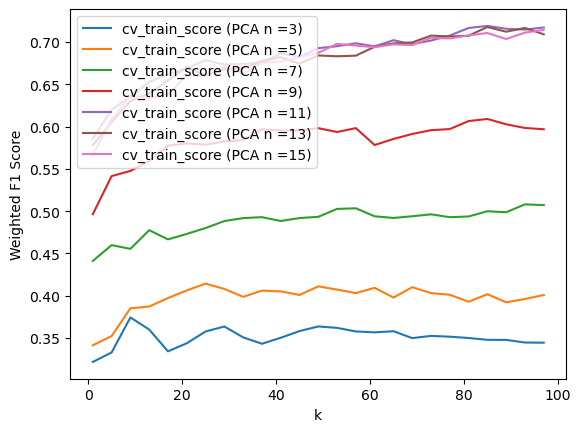

In [90]:
cv_res = pd.DataFrame(knn_pca_gs.cv_results_)

plt.figure()
for n in cv_res["param_pca__n_components"].unique():
    plt.plot(cv_res.loc[cv_res["param_pca__n_components"]==n,"param_knn__n_neighbors"],
             cv_res.loc[cv_res["param_pca__n_components"]==n,"mean_test_score"],
             label=f"cv_train_score (PCA n ={n})")
plt.xlabel("k")
plt.ylabel("Weighted F1 Score")
plt.legend(loc="upper left")
plt.show()

In [91]:
# Base Model Parameters
knn_pca_gs.best_params_

{'knn__n_neighbors': 85, 'pca__n_components': 11}

In [92]:
# Base Model Train Data F1 Score
print(f"The best K-Nearest Neighbor model (with PCA) is with F1 score of {round(knn_pca_gs.best_score_,4)}")

The best K-Nearest Neighbor model (with PCA) is with F1 score of 0.7191


In [93]:
# Make Prediction
knn_pca_y_pred = knn_pca_gs.predict(X_test)

In [94]:
conf_mat_df = pd.DataFrame(confusion_matrix(y_test,knn_pca_y_pred),
                           index = [f"Actual_Class_{i}" for i in y_test.unique()],
                           columns = [f"Predicted_Class_{i}" for i in y_test.unique()])
conf_mat_df

,Predicted_Class_1,Predicted_Class_0,Predicted_Class_2,Predicted_Class_3
Actual_Class_1,101,6,0,0
Actual_Class_0,22,62,29,2
Actual_Class_2,0,21,72,26
Actual_Class_3,0,0,31,83


In [95]:
print(classification_report(y_test,knn_pca_y_pred))

              precision    recall  f1-score   support

           0       0.82      0.94      0.88       107
           1       0.70      0.54      0.61       115
           2       0.55      0.61      0.57       119
           3       0.75      0.73      0.74       114

    accuracy                           0.70       455
   macro avg       0.70      0.70      0.70       455
weighted avg       0.70      0.70      0.70       455



In [96]:
print(f"The F1 score of the base model (K-Nearest Neighbor Classifier): {round(f1_score(y_test,knn_pca_y_pred,average='weighted'),4)}")

The F1 score of the base model (K-Nearest Neighbor Classifier): 0.6951


In [97]:
this_df = pd.DataFrame([{"model":"K-Nearest Neighbor (With PCA)","test_data_f1":round(f1_score(y_test,knn_pca_y_pred,average='weighted'),4)}])
model_comparison_df = pd.concat([model_comparison_df,this_df],ignore_index = True)
model_comparison_df

,model,test_data_f1
0,Logistic Regression,0.9385
1,Gradient Boosting,0.8682
2,Random Forest,0.8663
3,K-Nearest Neighbor,0.6950
4,K-Nearest Neighbor (With PCA),0.6951


It seems that KNN does not work well too.

# Naive Bayes

In Naive Bayes, we do not perform Grid Search with hyperparameters.

In [98]:
# Define k-fold cross validation
cv = StratifiedKFold(n_splits=5,
                     shuffle=True,
                     random_state=42)

In [99]:
# Instantiate the model with Grid Search and Cross Validation
nb = GaussianNB()

nb_pipeline = Pipeline([("my_sclaer",customized_scaler),
                         ("nb",nb)])

nb_gs = GridSearchCV(nb_pipeline,
                     param_grid = {},
                     scoring = "f1_weighted",
                     n_jobs = -1, 
                     verbose = 1)

In [100]:
# Model Fitting
nb_gs.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(estimator=Pipeline(steps=[('my_sclaer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         ['battery_power',
                                                                          'clock_speed',
                                                                          'int_memory',
                                                                          'm_dep',
                                                                          'mobile_wt',
                                                                          'n_cores',
                                                                          'pc',
                                                                          'ram',
                                                                          'talk_time',
                                                                          'px_area',
                                                                          'sc_area'])],
                                                          verbose_feature_names_out=False)),
                                       ('nb', GaussianNB())]),
             n_jobs=-1, param_grid={}, scoring='f1_weighted', verbose=1)

In [101]:
# Base Model Train Data F1 Score
print(f"The best Naive Bayes model is with F1 score of {round(nb_gs.best_score_,4)}")

The best Naive Bayes model is with F1 score of 0.7907


In [102]:
# Make Prediction
nb_y_pred = nb_gs.predict(X_test)

In [103]:
conf_mat_df = pd.DataFrame(confusion_matrix(y_test,nb_y_pred),
                           index = [f"Actual_Class_{i}" for i in y_test.unique()],
                           columns = [f"Predicted_Class_{i}" for i in y_test.unique()])
conf_mat_df

,Predicted_Class_1,Predicted_Class_0,Predicted_Class_2,Predicted_Class_3
Actual_Class_1,89,18,0,0
Actual_Class_0,5,85,25,0
Actual_Class_2,0,16,85,18
Actual_Class_3,0,0,16,98


In [104]:
print(classification_report(y_test,nb_y_pred))

              precision    recall  f1-score   support

           0       0.95      0.83      0.89       107
           1       0.71      0.74      0.73       115
           2       0.67      0.71      0.69       119
           3       0.84      0.86      0.85       114

    accuracy                           0.78       455
   macro avg       0.80      0.79      0.79       455
weighted avg       0.79      0.78      0.79       455



In [105]:
print(f"The F1 score of the Naive Bayes Classifier: {round(f1_score(y_test,nb_y_pred,average='weighted'),4)}")

The F1 score of the Naive Bayes Classifier: 0.7869


In [106]:
this_df = pd.DataFrame([{"model":"Naive Bayes","test_data_f1":round(f1_score(y_test,nb_y_pred,average='weighted'),4)}])
model_comparison_df = pd.concat([model_comparison_df,this_df],ignore_index = True)
model_comparison_df

,model,test_data_f1
0,Logistic Regression,0.9385
1,Gradient Boosting,0.8682
2,Random Forest,0.8663
3,K-Nearest Neighbor,0.6950
4,K-Nearest Neighbor (With PCA),0.6951
5,Naive Bayes,0.7869


# Conclusion

In this notebook, we perform EDA, data cleaning, data preprocessing & model comparison.  
From the above table, we can see our base model perform the best with the cleaned and preprocessed data.

This is also known as `the principle of Occam’s razor`. In English, it means "If you have two competing ideas to explain the same phenomenon, you should prefer the simpler one."

# Additional Part - Interpretation of the best logit model

In [107]:
# Retrieve our best logistics model
logit_best_model = base_logit_gs.best_estimator_.steps[1][1]

In [108]:
# Show Coefficients
base_logit_coef_df = pd.DataFrame(logit_best_model.coef_,
                                  index = [f"Class_{i}" for i in logit_best_model.classes_],
                                  columns = logit_best_model.feature_names_in_)
base_logit_coef_df["intercept"] = pd.Series(logit_best_model.intercept_,
                                            index = [f"Class_{i}" for i in logit_best_model.classes_]
                                           )
base_logit_coef_df

,battery_power,clock_speed,int_memory,m_dep,mobile_wt,n_cores,pc,ram,talk_time,px_area,sc_area,blue,dual_sim,four_g,touch_screen,wifi,intercept
Class_0,-4.842959,-0.072544,-0.357863,-0.035351,0.475998,-0.009979,-0.157386,-19.931040,0.162055,-4.765033,-0.155738,0.116857,0.413289,0.222624,0.557074,0.512626,-7.105902
Class_1,-1.661900,0.075905,-0.086058,-0.009466,0.266801,-0.100907,-0.058802,-6.535003,-0.157631,-1.610831,-0.203009,0.118251,-0.331366,-0.149634,0.047184,0.308247,5.541812
Class_2,1.573283,0.068322,-0.116472,-0.003007,0.025598,-0.027128,0.102408,6.805075,-0.017325,1.532810,0.050597,0.142632,-0.198011,-0.181890,-0.296199,-0.281635,6.023307
Class_3,4.931576,-0.071683,0.560393,0.047824,-0.768397,0.138015,0.113781,19.660968,0.012900,4.843054,0.308150,-0.377740,0.116088,0.108900,-0.308059,-0.539238,-4.459218


From the table above, we can see that some columns contributed a lot in predicting the price range.  
For instance, `battery_power`, `ram`, `px_area`. You can see a "symmetric" pattern in these columns.

From the below table, we can conclude the following 3 sentences:
- The more battery power a mobile has, the higher price range it can be.
- The more RAM a mobile has, the higher price range it can be.
- The larger pixel of camera a mobile has, the higher price range it can be.

In [109]:
base_logit_coef_df[["battery_power","ram","px_area"]]

,battery_power,ram,px_area
Class_0,-4.842959,-19.931040,-4.765033
Class_1,-1.661900,-6.535003,-1.610831
Class_2,1.573283,6.805075,1.532810
Class_3,4.931576,19.660968,4.843054


# Saving the best logit model

In [110]:

joblib.dump(base_logit_gs.best_estimator_, "best_logit.pkl", compress = 1)

['best_logit.pkl']